<a href="https://www.kaggle.com/code/azmiord/credit-card-fraud-detection?scriptVersionId=187610882" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Introduction

## About the Project

Credit card fraud is a significant problem in the financial industry, leading to billions of dollars in losses annually. As digital transactions become more prevalent, the need for robust fraud detection systems becomes increasingly critical. This project aims to build a machine learning model to detect fraudulent credit card transactions using the Credit Card Fraud Detection dataset from Kaggle.

## Goals

Detecting fraudulent transactions in real-time can significantly reduce financial losses for banks and credit card companies. This project aims to leverage machine learning techniques to develop a model that can accurately and efficiently identify fraudulent transactions, thereby enhancing the security and reliability of credit card payment systems.

## Dataset Description

The dataset used in this project contains transactions made by credit cards in September 2013 by European cardholders. It is highly imbalanced, with only 492 fraudulent transactions out of 284,807. 

## Attribute Information

- Time: 
Number of seconds elapsed between this transaction and the first transaction in the dataset.
- V1 to V28: 
Principal components obtained with PCA, used to anonymize the data.
- Amount: 
Transaction amount.
- Class: 
Target variable (1 for fraudulent transactions, 0 for non-fraudulent transactions)

# 2. Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

# 3. Data Understanding

## 3.1 Load the Data

In [2]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.shape

(284807, 31)

## 3.2 Summary Statistics

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 3.3 Check for Missing Values

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


no Null Values in sight

# 4. Exploratory Data Analysis

## 4.1 Class Distribution

Class
0    284315
1       492
Name: count, dtype: int64


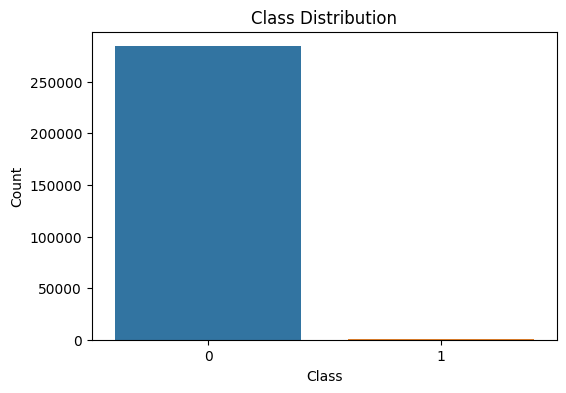

In [7]:
# Class distribution
class_counts = df['Class'].value_counts()
print(class_counts)

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Out of 284,807 transactions, 492 are fraudulent. Which makes the dataset highly imbalanced.

## 4.2 Feature Correlations

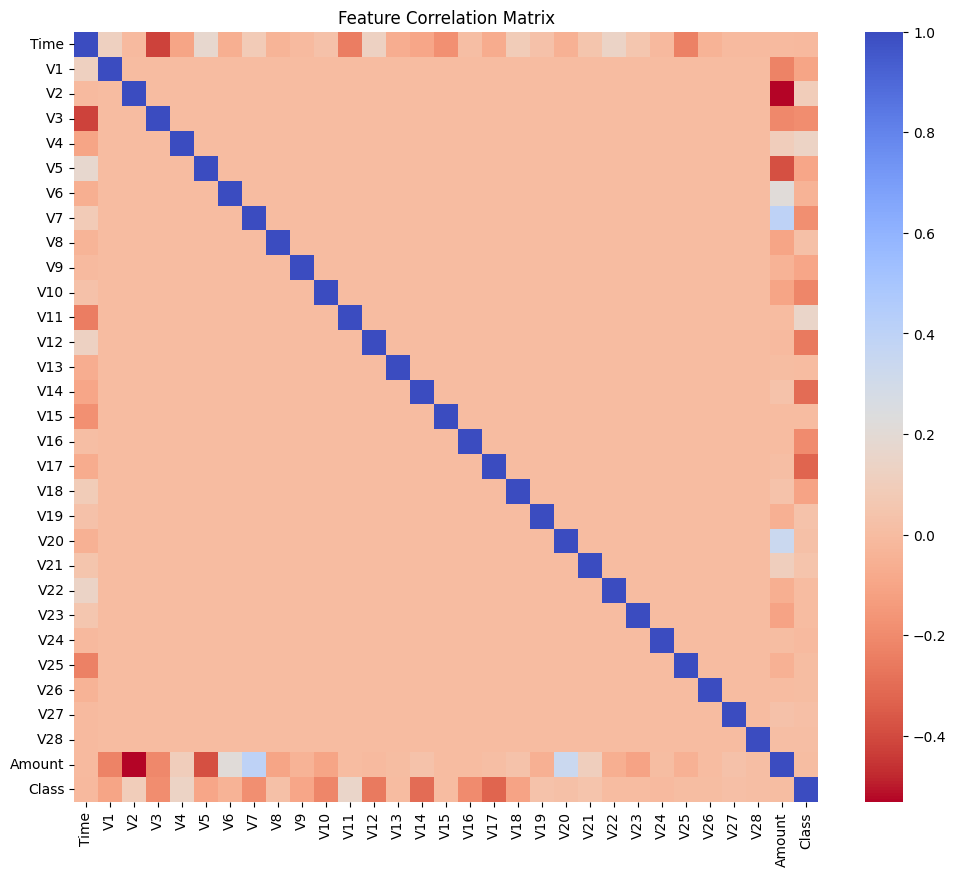

In [8]:
# Compute correlation matrix
corr_matrix = df.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm_r', annot_kws={'size': 20})
plt.title('Feature Correlation Matrix')
plt.show()

- The 'Class' variable indicates whether a transaction is fraudulent (1) or not (0). We observe that some features have noticeable correlations with the 'Class' variable. For instance, features like V4, V10, V12, V14, and V17 have higher positive or negative correlations with the target variable. These features might be important predictors in identifying fraudulent transactions.
- Most features are not strongly correlated with each other, as shown by the predominantly light colors (near-zero correlations) in the matrix. This suggests low multicollinearity, which is beneficial for model performance and interpretation.
- 'Time' and 'Amount' have little to no correlation with most of the V1 to V28 features. 'Time' has a slight positive correlation with some features but nothing significant.
- 'Amount' shows a slight positive correlation with the target variable 'Class', indicating that the transaction amount could have some predictive power in identifying fraud.

## 4.3 Distribution of Transaction Amounts

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


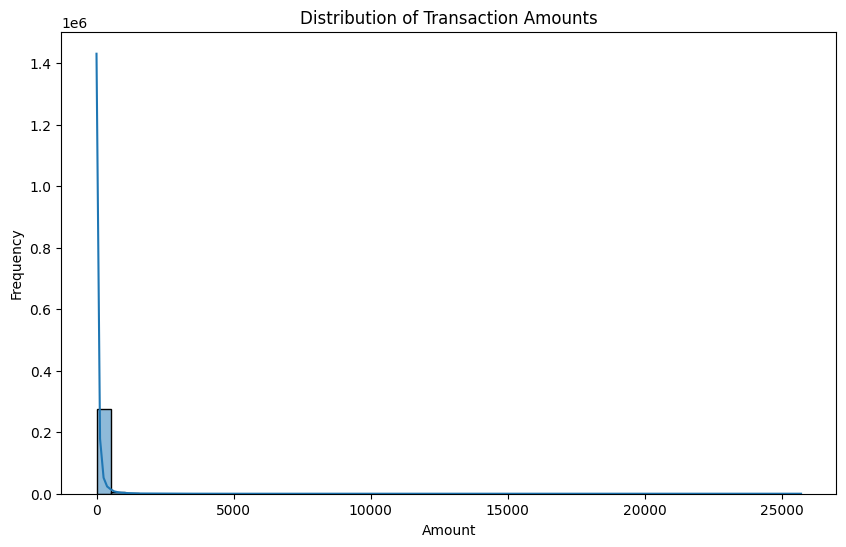

In [9]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

- The distribution of transaction amounts is highly skewed to the right. Most of the transactions are of relatively low amounts, with a very high frequency of transactions close to zero.
- This kind of skewness indicating the needs to transform this data (scaling)

## 4.4 Time vs. Transaction Amount

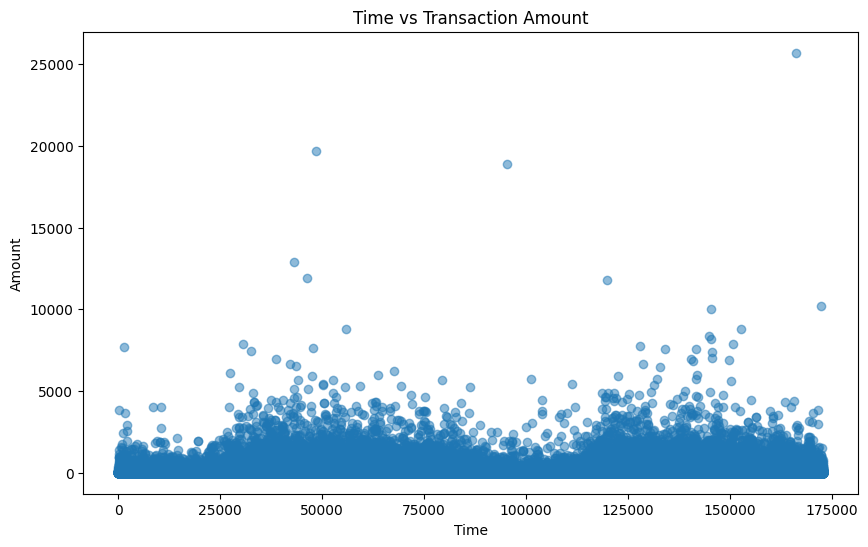

In [10]:
# Scatter plot of time vs transaction amount
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'], df['Amount'], alpha=0.5)
plt.title('Time vs Transaction Amount')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

- The majority of transaction amounts are clustered at the lower end, consistent with the highly skewed distribution observed earlier.
- Transactions occur across the entire time range, with no apparent time periods completely devoid of activity.
- High-value transactions are relatively infrequent but occur throughout the time period, indicating no specific time is more prone to high-value transactions.
- The scatter plot does not reveal a clear trend or pattern in the relationship between transaction amounts and time. This suggests that the transaction amount does not significantly depend on the time of the transaction.

## 4.5 Distribution of PCA Components

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

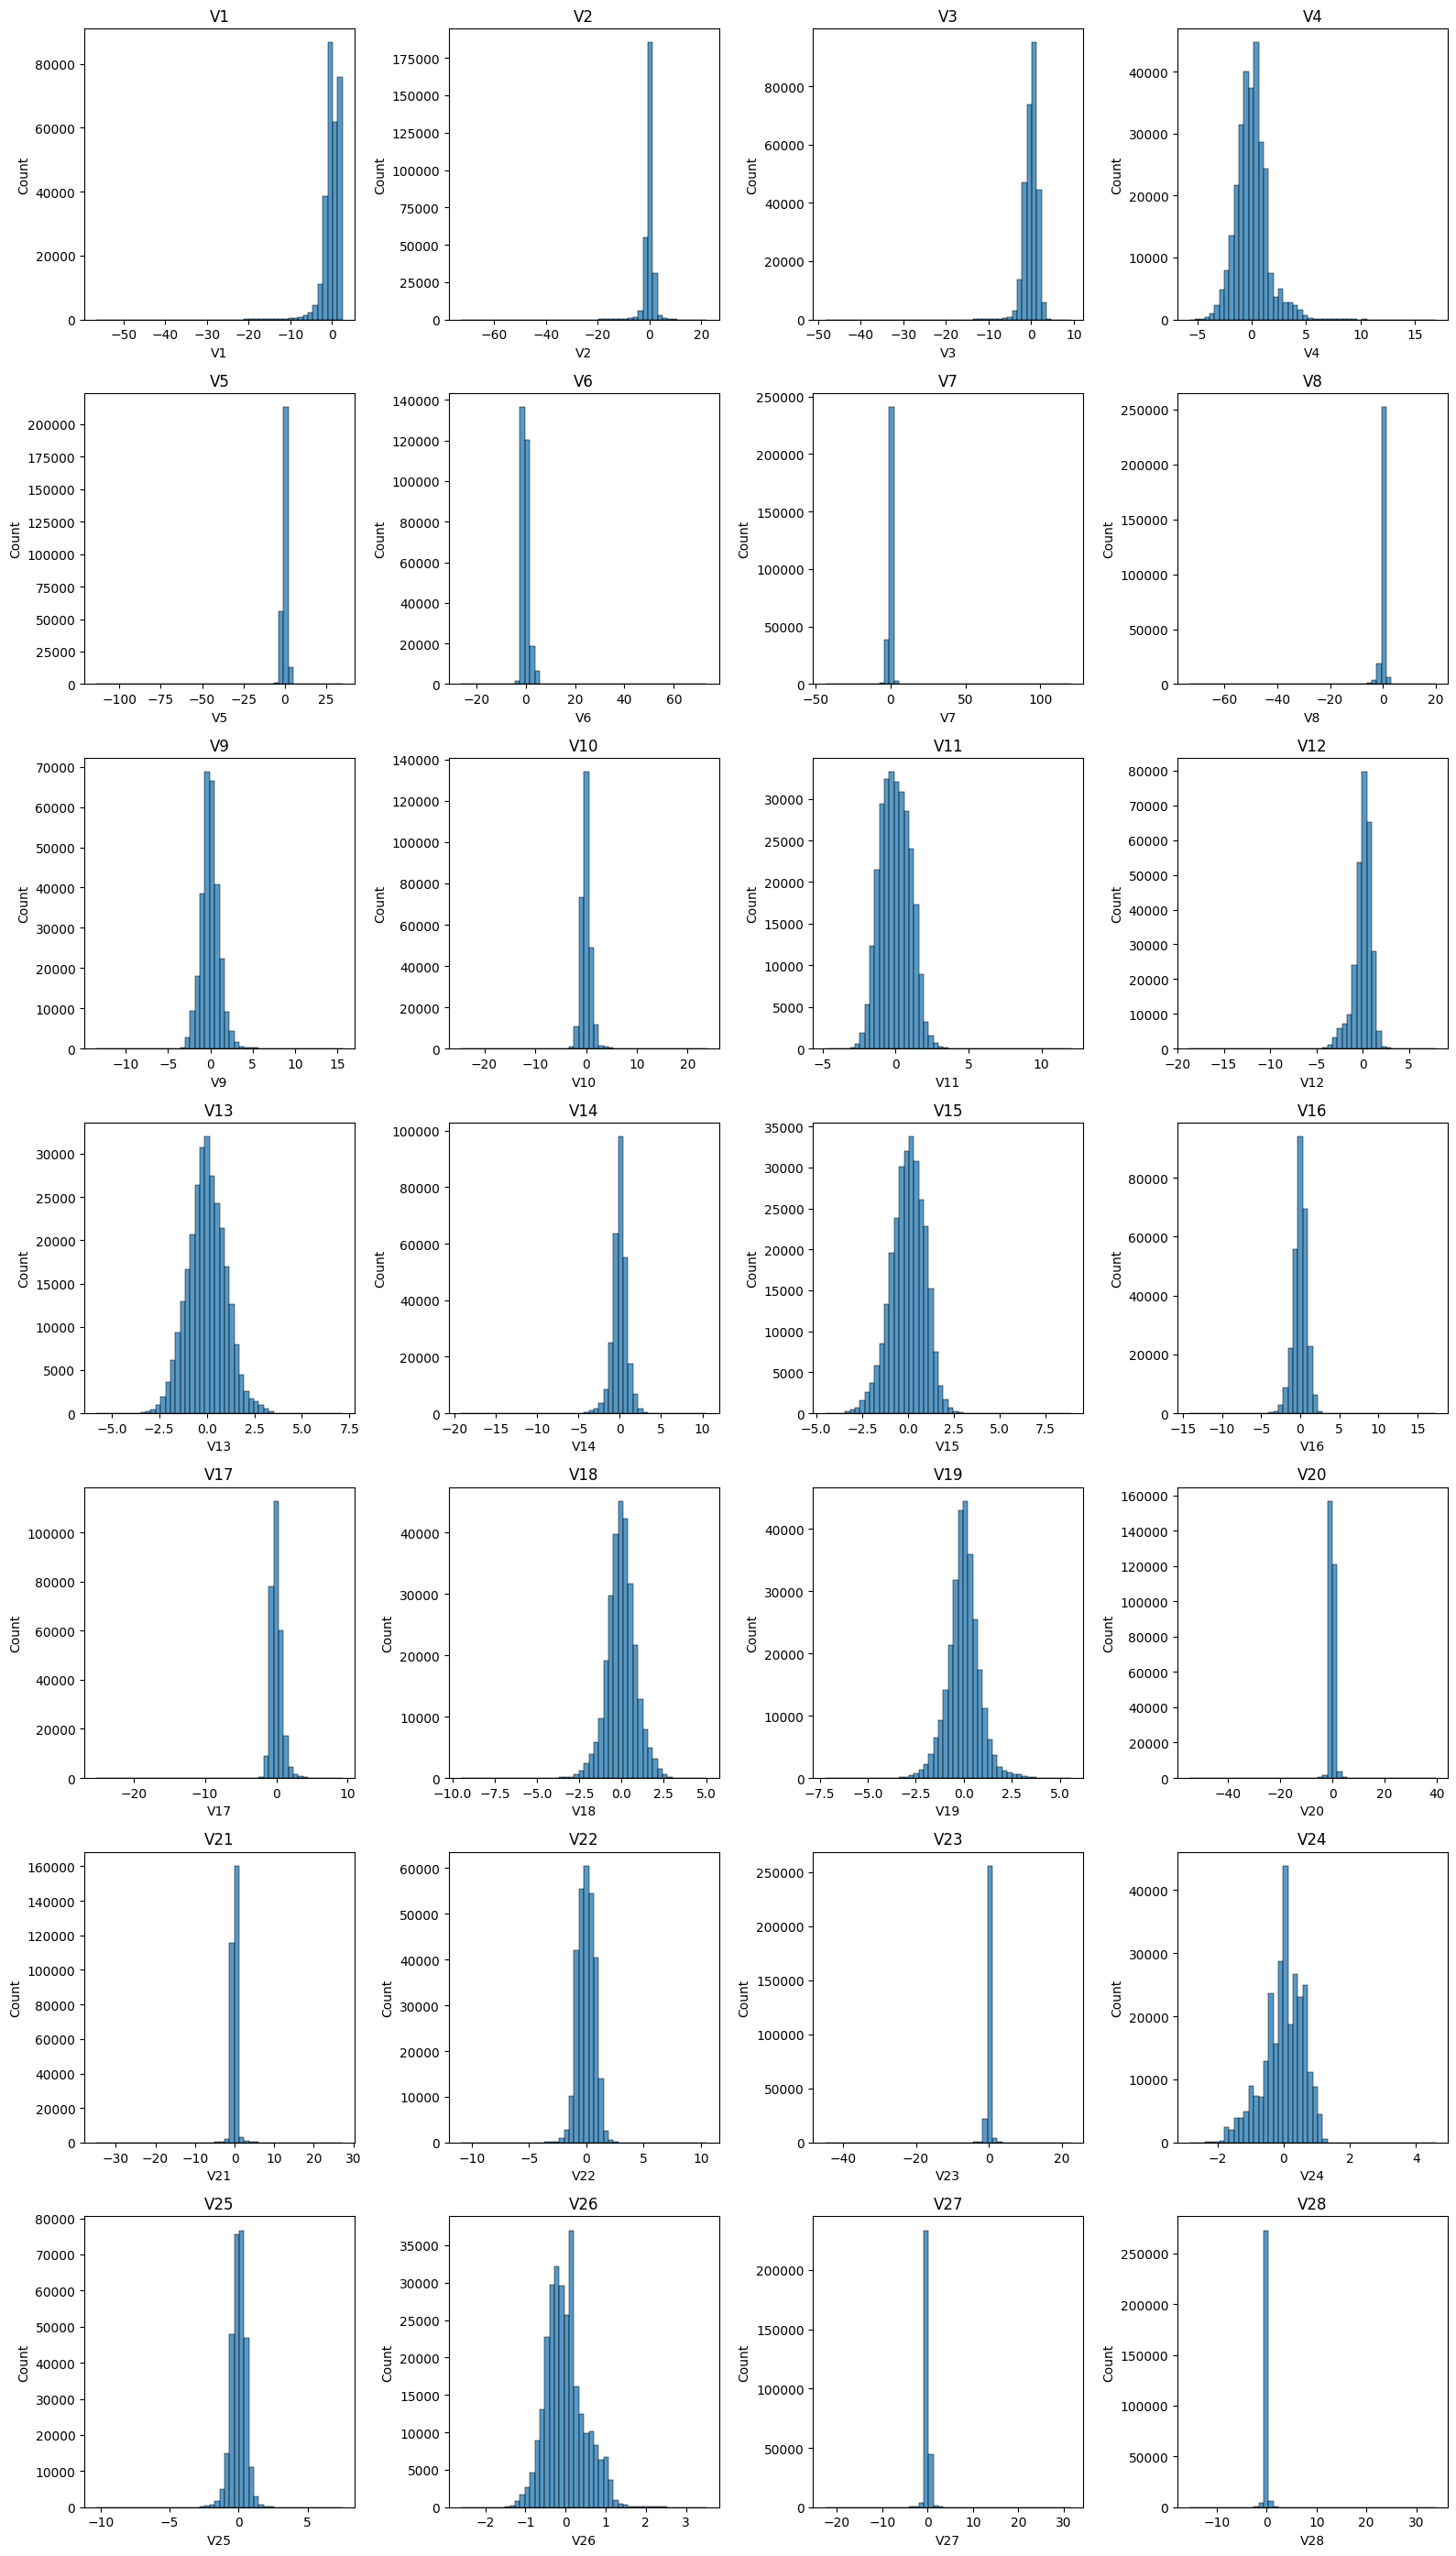

In [11]:
# Plot distributions of PCA components
fig, ax = plt.subplots(7, 4, figsize=(16, 28))
for i, col in enumerate(df.columns[1:29]):
    sns.histplot(df[col], bins=50, ax=ax[i // 4, i % 4])
    ax[i // 4, i % 4].set_title(col)
plt.tight_layout()
plt.show()

Considering these are anonymized features, these distributions become more important

- **Left-Skewed Distributions**: 
    - Most of the features (V1, V2, V3, V5, V6, V7, V8, V9, V10, V12, V14, V16, V17, V20, V21, V23) exhibit left-skewed distributions. This indicates that the majority of the values for these features are clustered around -2 to 0, with long tails extending towards negative values.
- **Near-Normal Distributions**: 
    - Some features (V4, V11, V13, V15, V18, V19, V22) show near-normal distributions. These distributions are roughly symmetric, centered around 0, and suggest that the values are spread evenly around the mean.
- **Right-Skewed Distributions**: 
    - One feature, V24, shows a slight right-skewed distribution, indicating that most values are clustered around -1 to 1, with a tail extending towards positive values.
- **Narrow, Sharp Peak Distributions**: 
    - Features like V25, V26, V27, and V28 have narrow distributions with sharp peaks centered around 0. This suggests that the majority of the values for these features are very close to 0, indicating low variability.

## 4.6 Analyze Fraudulent vs. Non-Fraudulent Transactions

In [12]:
# Compare summary statistics of fraudulent and non-fraudulent transactions
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

print(fraud.describe())
print(non_fraud.describe())

                Time          V1          V2          V3          V4  \
count     492.000000  492.000000  492.000000  492.000000  492.000000   
mean    80746.806911   -4.771948    3.623778   -7.033281    4.542029   
std     47835.365138    6.783687    4.291216    7.110937    2.873318   
min       406.000000  -30.552380   -8.402154  -31.103685   -1.313275   
25%     41241.500000   -6.036063    1.188226   -8.643489    2.373050   
50%     75568.500000   -2.342497    2.717869   -5.075257    4.177147   
75%    128483.000000   -0.419200    4.971257   -2.276185    6.348729   
max    170348.000000    2.132386   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9  ...  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  ...   
mean    -3.151225   -1.397737   -5.568731    0.570636   -2.581123  ...   
std      5.372468    1.858124    7.206773    6.797831    2.500896  ...   
min    -22.105532   -6.406267  -43.557242  -41.044261  

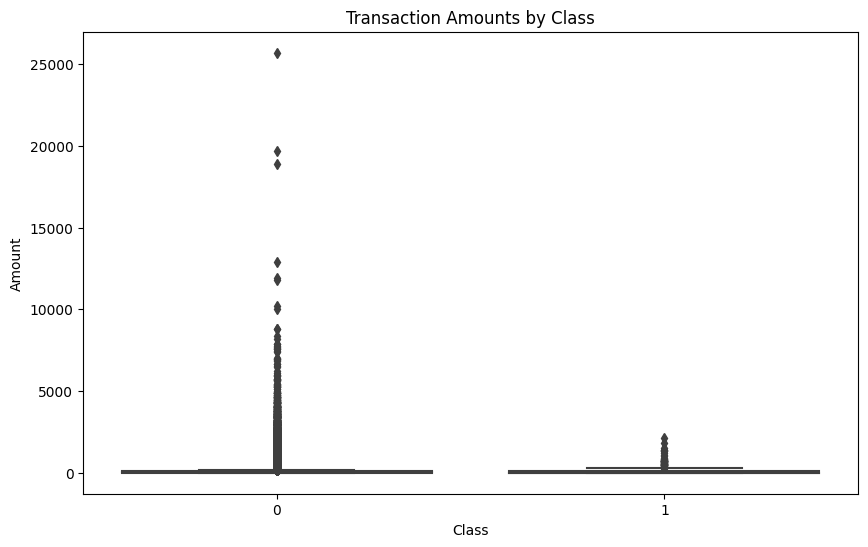

In [13]:
# Boxplots of Amount for Fraudulent and Non-Fraudulent transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amounts by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

- Both fraudulent and non-fraudulent transactions have low median amounts, suggesting that small transactions are common in both classes.
- Non-fraudulent transactions exhibit greater variability in transaction amounts compared to fraudulent ones. This is evident from the wider spread of the IQR and the presence of higher-value outliers.
- Non-fraudulent transactions include some very high-value outliers, whereas fraudulent transactions have fewer and smaller outliers. This could imply that fraudulent transactions tend to avoid very large amounts, potentially to evade detection.

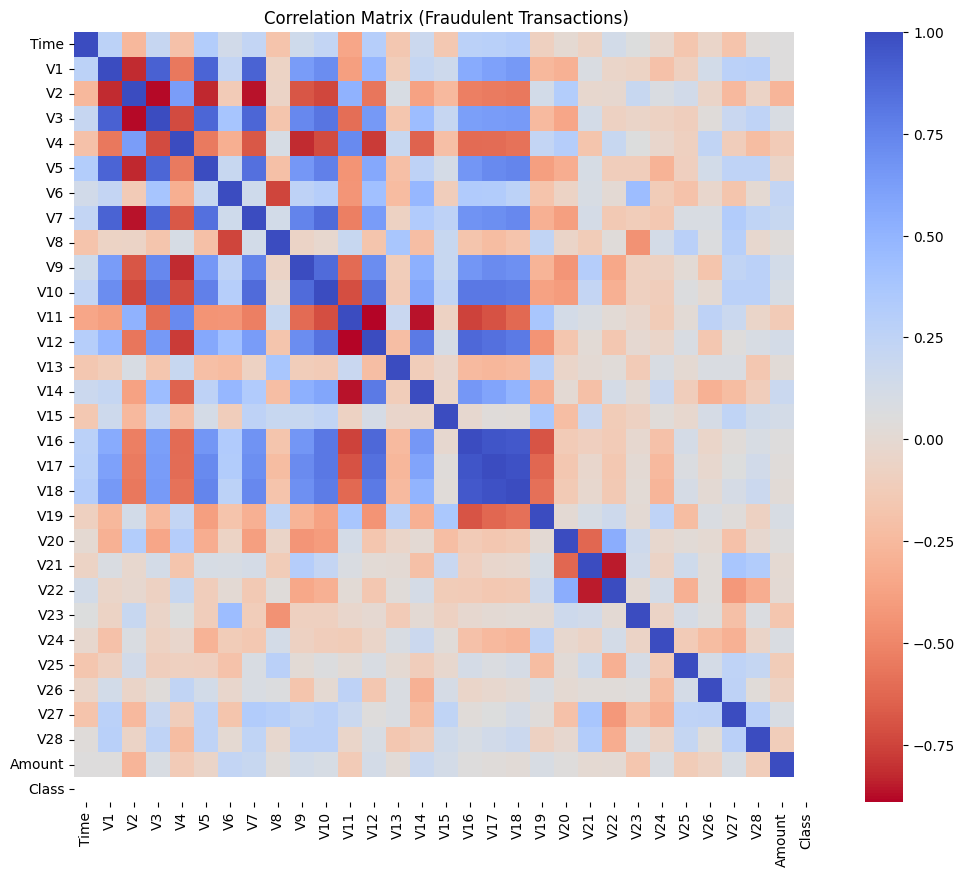

In [14]:
# Heatmap of correlations for fraudulent transactions
plt.figure(figsize=(12, 10))
sns.heatmap(fraud.corr(), cmap='coolwarm_r', annot_kws={'size': 20})
plt.title('Correlation Matrix (Fraudulent Transactions)')
plt.show()

The specific features showing correlations can be further investigated to understand their underlying relationships and how they might relate to fraudulent behavior. This understanding can guide the design of more effective detection rules or models.

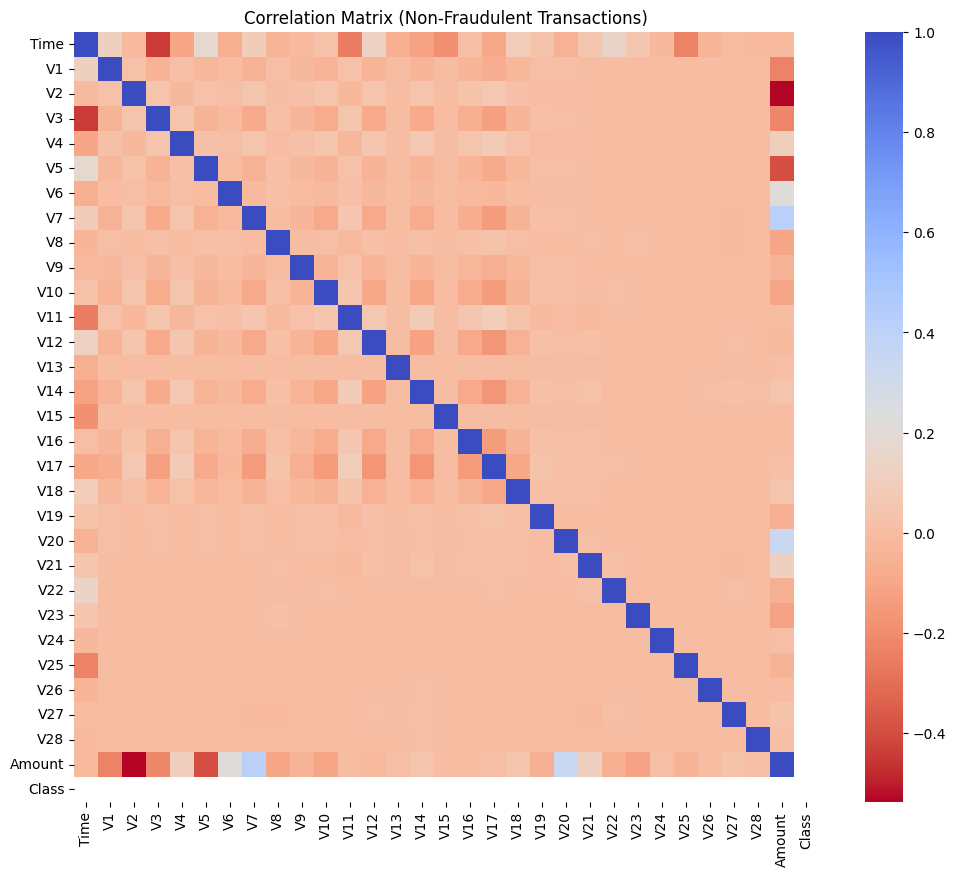

In [15]:
# Heatmap of correlations for non-fraudulent transactions
plt.figure(figsize=(12, 10))
sns.heatmap(non_fraud.corr(), cmap='coolwarm_r', annot_kws={'size': 20})
plt.title('Correlation Matrix (Non-Fraudulent Transactions)')
plt.show()

- Some features seem to have some correlations with each other. This might be due to their transformation from original features using PCA, capturing some common underlying patterns.
- The correlation between Amount and other features is generally low, suggesting that the transaction amount is relatively independent of other PCA-transformed features.

# 5. Feature Scaling

In [16]:
# Scale 'Amount' and 'Time'
df['Scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Scaled_Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

In [17]:
# Drop original 'Amount' and 'Time' columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

This is to ensure that features like transaction amount and transaction frequency are on the same scale, preventing the model from being biased towards features with larger numeric ranges.

In [18]:
# Display the first few rows of the dataframe to verify changes
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


# 6. Model Building

## 6.1 Data Preparation

### Split the Data

In [19]:
# Split the data into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Handle Class Imbalance with SMOTE

In [20]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Display the new class distribution
print(pd.Series(y_train_sm).value_counts())

Class
0    227451
1    227451
Name: count, dtype: int64


Class
0    227451
1    227451
Name: count, dtype: int64


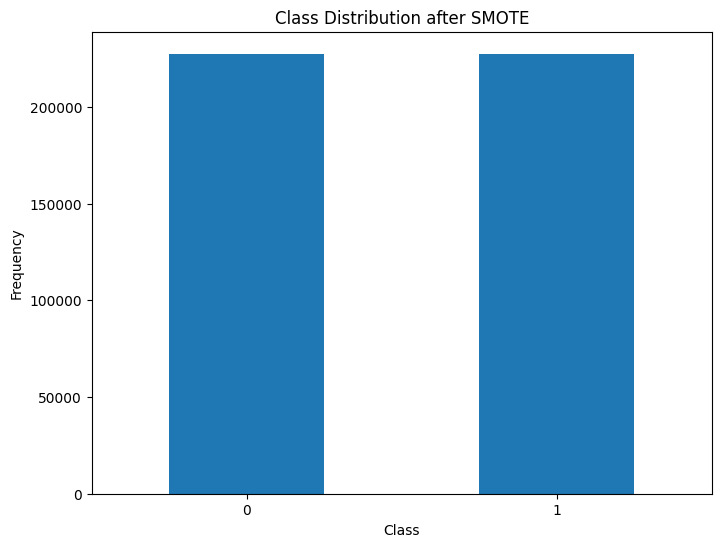

In [21]:
# Display the new class distribution
class_counts = pd.Series(y_train_sm).value_counts()
print(class_counts)

# Create a bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution after SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


## 6.2 Modeling

### Random Forest Classifier

In [22]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_sm, y_train_sm)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))
print("Precision Score:", precision_score(y_test, y_pred_rf))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56847    17]
 [   18    80]]
ROC AUC Score: 0.908013785846359
Precision Score: 0.8247422680412371


### XGBoost Classifier

In [23]:
# Train an XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_sm, y_train_sm)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb))
print("Precision Score:", precision_score(y_test, y_pred_xgb))

XGBoost Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.89      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56832    32]
 [   11    87]]
ROC AUC Score: 0.9435961779196765
Precision Score: 0.7310924369747899


### Logistic Regression

In [24]:
# Train a Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_sm, y_train_sm)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))
print("Precision Score:", precision_score(y_test, y_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Confusion Matrix:
[[55403  1461]
 [    8    90]]
ROC AUC Score: 0.946337232839112
Precision Score: 0.058027079303675046


## 6.3 Model Evaluation

### Cross-Validation

In [25]:
# Cross-validation for Logistic Regression
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_cv_scores = cross_val_score(lr_model, X_train_sm, y_train_sm, cv=cv, scoring='roc_auc')
print("Logistic Regression CV ROC AUC Scores:", lr_cv_scores)
print("Logistic Regression CV ROC AUC Mean:", lr_cv_scores.mean())

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train_sm, y_train_sm, cv=cv, scoring='roc_auc')
print("Random Forest CV ROC AUC Scores:", rf_cv_scores)
print("Random Forest CV ROC AUC Mean:", rf_cv_scores.mean())

# Cross-validation for XGBoost
xgb_cv_scores = cross_val_score(xgb_model, X_train_sm, y_train_sm, cv=cv, scoring='roc_auc')
print("XGBoost CV ROC AUC Scores:", xgb_cv_scores)
print("XGBoost CV ROC AUC Mean:", xgb_cv_scores.mean())

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression CV ROC AUC Scores: [0.99167508 0.99151928 0.99161239 0.99150916 0.99146582]
Logistic Regression CV ROC AUC Mean: 0.9915563465365759
Random Forest CV ROC AUC Scores: [0.99999825 0.99999999 0.99999983 0.99999675 0.99999928]
Random Forest CV ROC AUC Mean: 0.9999988200180236
XGBoost CV ROC AUC Scores: [0.99997454 0.99999983 0.99999642 0.9999703  0.99999601]
XGBoost CV ROC AUC Mean: 0.9999874177923826


### Confusion Matrix

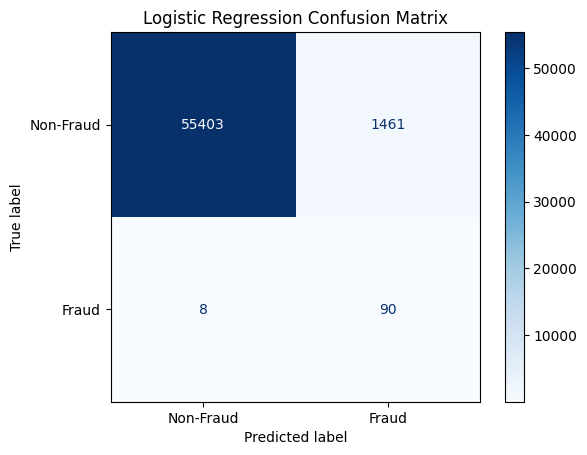

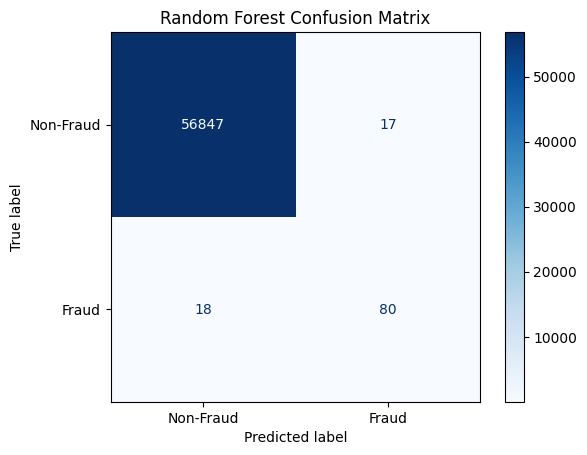

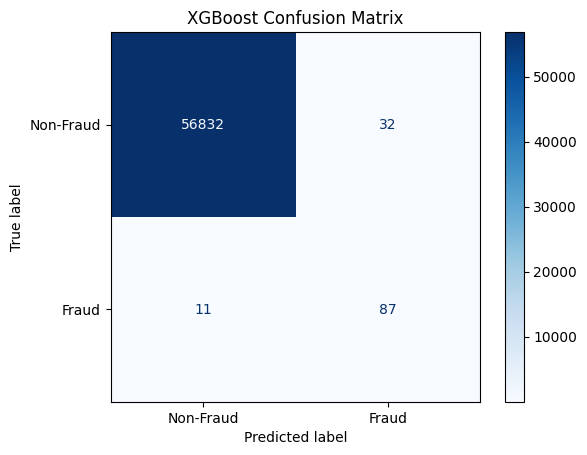

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix for Logistic Regression
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, display_labels=['Non-Fraud', 'Fraud'], cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Plot confusion matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=['Non-Fraud', 'Fraud'], cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

# Plot confusion matrix for XGBoost
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, display_labels=['Non-Fraud', 'Fraud'], cmap=plt.cm.Blues)
plt.title('XGBoost Confusion Matrix')
plt.show()

Logistic Regression Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.97      0.99     56864
       Fraud       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Logistic Regression AUC-ROC: 0.97

Random Forest Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest AUC-ROC: 0.97

XGBoost Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.73      0.89      0.80        98

    acc

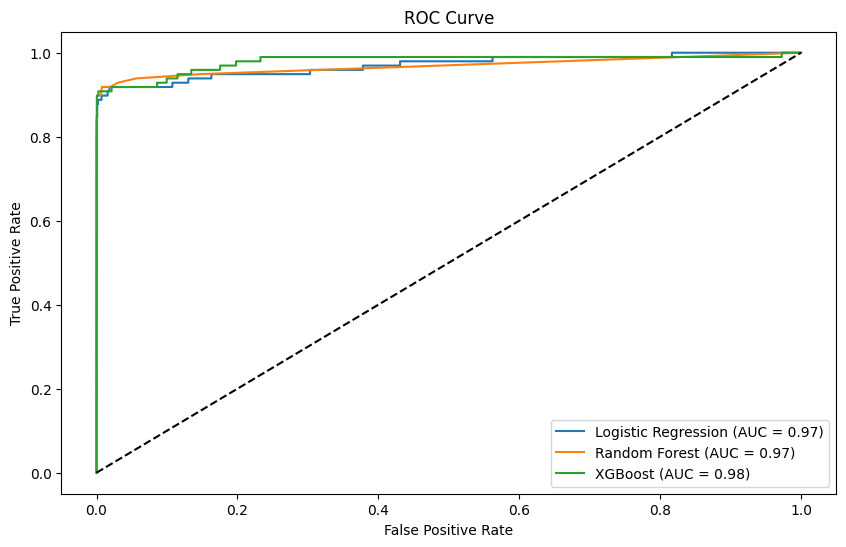

In [27]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc

# Logistic Regression
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions, target_names=['Non-Fraud', 'Fraud']))
lr_auc_roc = roc_auc_score(y_test, lr_probabilities)
print(f"Logistic Regression AUC-ROC: {lr_auc_roc:.2f}")

# Random Forest
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions, target_names=['Non-Fraud', 'Fraud']))
rf_auc_roc = roc_auc_score(y_test, rf_probabilities)
print(f"Random Forest AUC-ROC: {rf_auc_roc:.2f}")

# XGBoost
xgb_predictions = xgb_model.predict(X_test)
xgb_probabilities = xgb_model.predict_proba(X_test)[:, 1]

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions, target_names=['Non-Fraud', 'Fraud']))
xgb_auc_roc = roc_auc_score(y_test, xgb_probabilities)
print(f"XGBoost AUC-ROC: {xgb_auc_roc:.2f}")

# Plot ROC Curves
plt.figure(figsize=(10, 6))

fpr, tpr, _ = roc_curve(y_test, lr_probabilities)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {lr_auc_roc:.2f})')

fpr, tpr, _ = roc_curve(y_test, rf_probabilities)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rf_auc_roc:.2f})')

fpr, tpr, _ = roc_curve(y_test, xgb_probabilities)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {xgb_auc_roc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


## 6.4 Model Selection

### Logistic Regression

- Very high recall (0.92) but extremely low precision (0.06), indicating many false positives.
- High ROC AUC score (0.9463) but poor overall performance due to low precision.

### Random Forest

- Balanced precision (0.82) and recall (0.82) with a good F1-score (0.82).
- Slightly lower ROC AUC score (0.9080) compared to others, but the model performs well in identifying both classes.
- Very high cross-validation ROC AUC mean (0.9999), indicating strong and consistent performance.

### XGBoost

- Good balance with high recall (0.89) and lower but reasonable precision (0.73).
- High F1-score (0.80) and strong ROC AUC score (0.9436).
- Excellent cross-validation ROC AUC mean (0.9999), indicating strong and consistent performance.

### Model Summary:

Random Forest Classifier and XGBoost Classifier both perform exceptionally well based on the metrics. However, XGBoost shows a slightly higher recall and ROC AUC score than Random Forest, which can be beneficial in a fraud detection context where catching fraudulent transactions (recall) is crucial.

### Best Model

XGBoost Classifier is recommended as the best model based on the higher recall, good precision, and overall strong ROC AUC score. This model strikes a good balance between minimizing false negatives (important in fraud detection) while maintaining reasonable precision.